In [2]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all.h5ad')

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [39]:
adata

AnnData object with n_obs × n_vars = 1649672 × 18601
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv'

In [40]:
microglia = adata[adata.obs.subset == 'Microglia']

In [41]:
microglia

View of AnnData object with n_obs × n_vars = 86612 × 18601
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv'

In [42]:
microglia.obs.individualID.value_counts()

individualID
NA          1091
R8760165     686
R1028639     628
R8724814     507
R4078277     495
            ... 
R4744901      32
R6337324      21
R9904978      19
R5405023      15
R7506996      14
Name: count, Length: 450, dtype: int64

In [43]:
microglia = microglia[microglia.obs.individualID != 'NA'] # filter out individual id is na
microglia.obs["age_death"] = pd.to_numeric(microglia.obs["age_death"], errors="coerce") # age to nurmerical
microglia.obs['AD'] = np.where(microglia.obs['ceradsc'].isin([3.0, 4.0]), 'healthy', 'AD') # add AD label

/var/tmp/ipykernel_2846305/1059044863.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  microglia.obs["age_death"] = pd.to_numeric(microglia.obs["age_death"], errors="coerce") # age to nurmerical


In [44]:
microglia.X.data

array([1., 2., 1., ..., 1., 1., 1.])

In [ ]:
# microglia.layers['count'] = microglia.X.copy()

In [45]:
microglia.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/microglia_annot.h5ad')

In [24]:
sc.pp.normalize_total(microglia)
sc.pp.log1p(microglia)
sc.pp.highly_variable_genes(microglia, n_top_genes=2000, subset = True)

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [25]:
sc.pp.pca(microglia)
sc.pp.neighbors(microglia)
sc.tl.umap(microglia)

/home/icb/zihe.zheng/miniconda3/envs/scanpy_dask/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


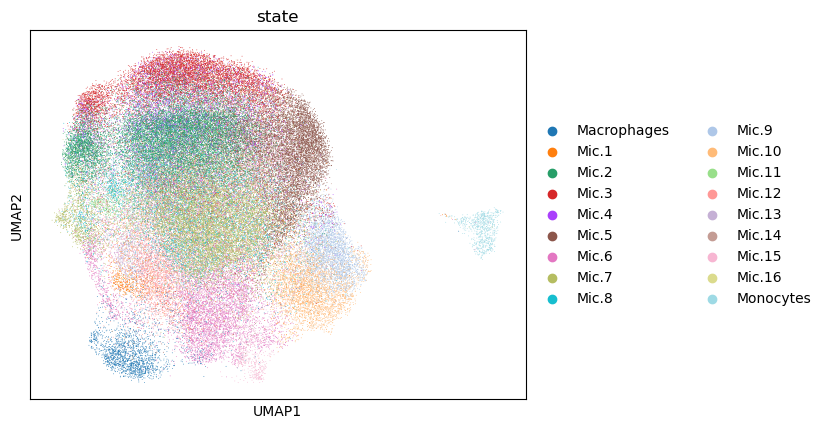

In [26]:
sc.pl.umap(microglia, color = 'state')

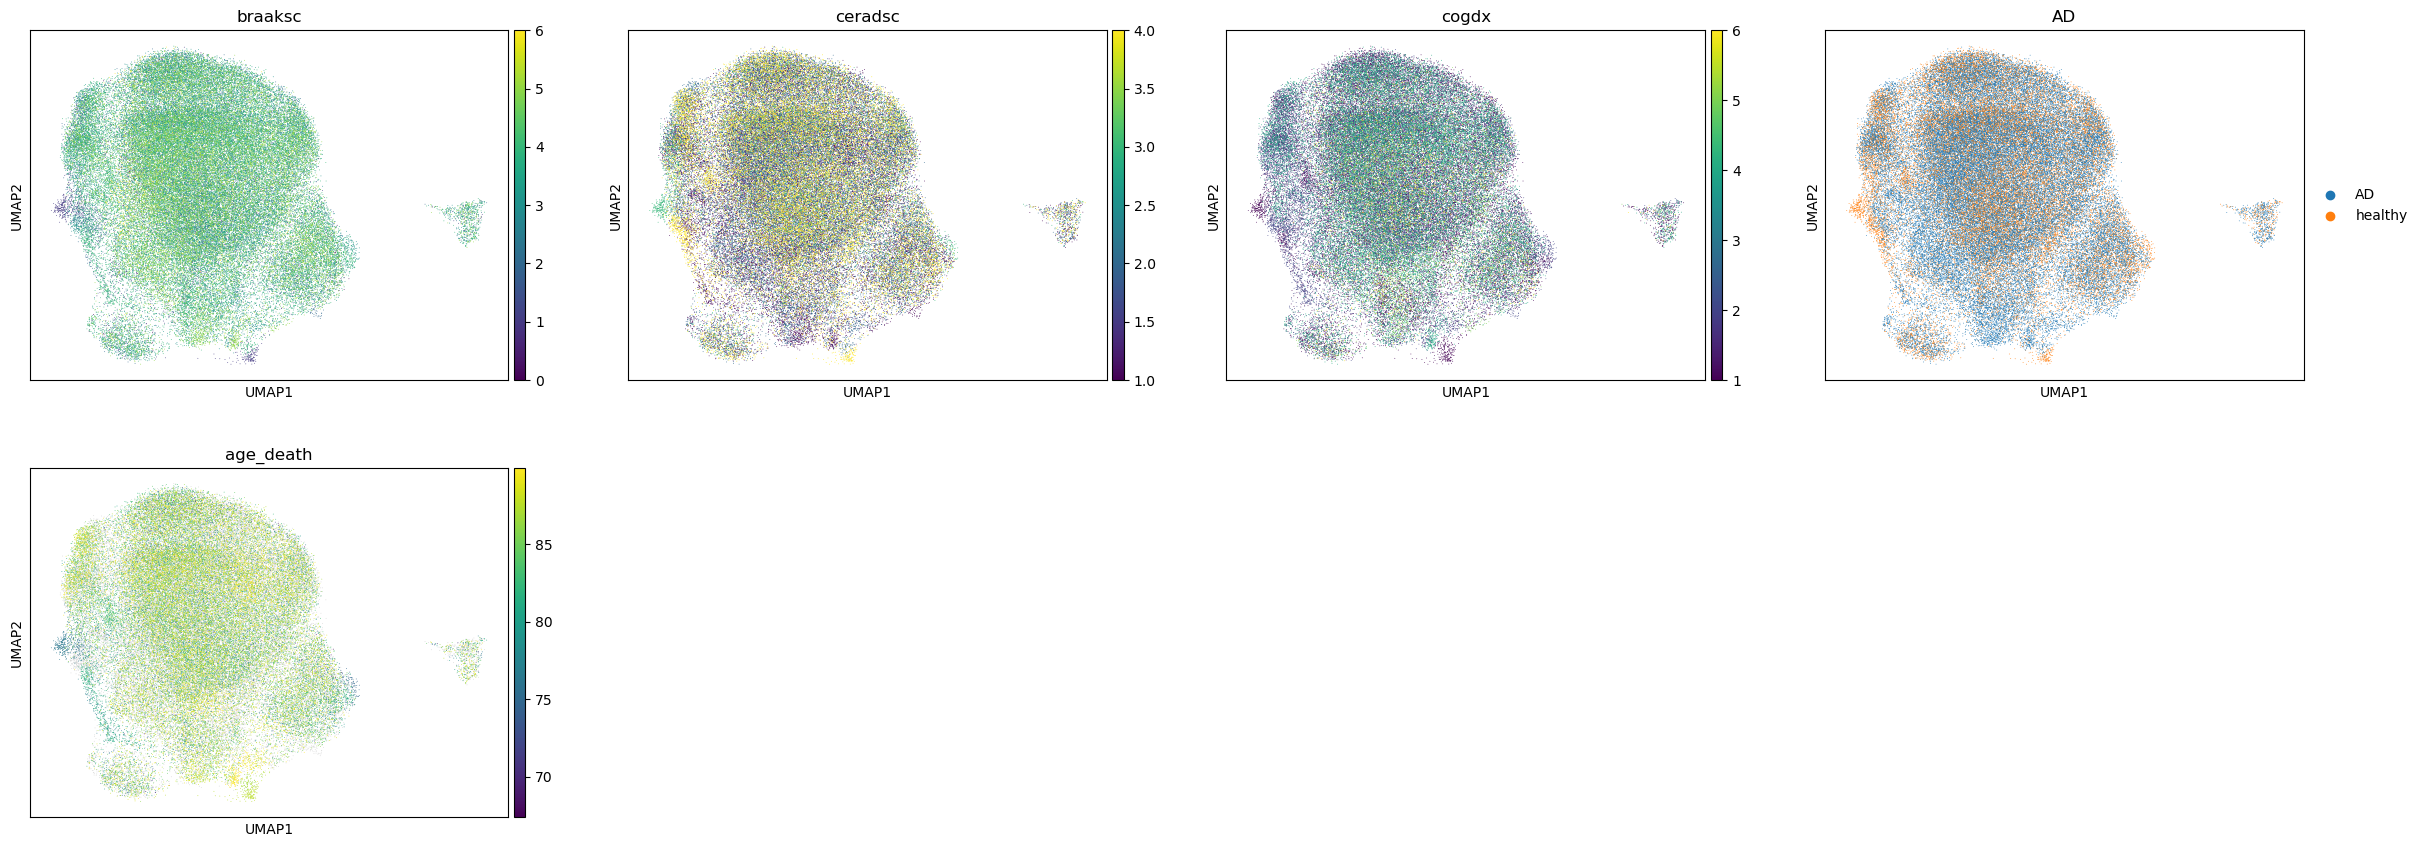

In [37]:
sc.pl.umap(microglia, color = ['braaksc', 'ceradsc', 'cogdx', 'AD', 'age_death'])